In [546]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/Original_data/98782516-9011-3481-B456-7DD9BD8243A5.csv")



In [547]:
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [548]:
df1=df[['Year','State','Ag District','County','Data Item','Value']].copy()

In [549]:
df1

,Year,State,Ag District,County,Data Item,Value
0,2022,NORTH DAKOTA,CENTRAL,EDDY,WHEAT - ACRES HARVESTED,"35,952"
1,2022,NORTH DAKOTA,CENTRAL,EDDY,"WHEAT - PRODUCTION, MEASURED IN BU","1,840,269"
2,2022,NORTH DAKOTA,CENTRAL,EDDY,"WHEAT - SALES, MEASURED IN $","16,007,000"
3,2022,NORTH DAKOTA,CENTRAL,FOSTER,WHEAT - ACRES HARVESTED,"46,919"
4,2022,NORTH DAKOTA,CENTRAL,FOSTER,"WHEAT - PRODUCTION, MEASURED IN BU","2,516,722"
...,...,...,...,...,...,...
1415,2010,NORTH DAKOTA,WEST CENTRAL,MERCER,"WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED ...",39.5
1416,2010,NORTH DAKOTA,WEST CENTRAL,MERCER,"WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU /...",39
1417,2010,NORTH DAKOTA,WEST CENTRAL,MERCER,"WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE",58.4
1418,2010,NORTH DAKOTA,WEST CENTRAL,OLIVER,"WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED ...",40


In [550]:
df1['Data Item'].unique()

array(['WHEAT - ACRES HARVESTED', 'WHEAT - PRODUCTION, MEASURED IN BU',
       'WHEAT - SALES, MEASURED IN $',
       'WHEAT, IRRIGATED - ACRES HARVESTED',
       'WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE'], dtype=object)

In [551]:
yield_types = [
    'WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED IN BU / ACRE',
    'WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU / ACRE',
    'WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE'
]

# Use the replace method to rename the specified yield types to "Yield"
df1['Data Item'] = df['Data Item'].replace(yield_types, 'Yield')

In [552]:
import pandas as pd

# List of data items you're interested in
data_items = [
    'WHEAT - ACRES HARVESTED',
    'WHEAT - PRODUCTION, MEASURED IN BU',
    'WHEAT - SALES, MEASURED IN $',
    'WHEAT, IRRIGATED - ACRES HARVESTED',
    'Yield'
]

# Assuming 'df1' is your original DataFrame
final_df = pd.DataFrame()  # Initialize an empty DataFrame to store final results

for item in data_items:
    # Filter the DataFrame for the current data item
    temp_df = df1[df1['Data Item'] == item]

    # Convert the 'Value' column to numeric, assuming values might contain commas
    temp_df['Value Numeric'] = pd.to_numeric(temp_df['Value'].str.replace(',', ''), errors='coerce')

    # Group by 'State', 'Ag District', and 'County', then sum the numeric values
    aggregated_values = temp_df.groupby(['State', 'Ag District', 'County','Year'])['Value Numeric'].sum().reset_index()

    # Rename the aggregated column for clarity
    aggregated_values.rename(columns={'Value Numeric': f'Total {item}'}, inplace=True)

    # If final_df is empty, initialize it with aggregated_values
    if final_df.empty:
        final_df = aggregated_values
    else:
        # Merge the aggregated values into the final_df
        final_df = pd.merge(final_df, aggregated_values, on=['State', 'Ag District', 'County','Year'], how='outer')

# Handle NaN values that might result from the outer join
final_df.fillna(0, inplace=True)

<ipython-input-552-6a3e17b5902d>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-552-6a3e17b5902d>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-552-6a3e17b5902d>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-552-

In [553]:
final_df['County ANSI'] = df['County ANSI'].copy()

final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",Total Yield,County ANSI
0,NORTH DAKOTA,CENTRAL,EDDY,2012,42256.0,1713829.0,12749000.0,6.0,46.0,27
1,NORTH DAKOTA,CENTRAL,EDDY,2017,42829.0,2192578.0,11411000.0,0.0,48.1,27
2,NORTH DAKOTA,CENTRAL,EDDY,2022,35952.0,1840269.0,16007000.0,0.0,41.8,27
3,NORTH DAKOTA,CENTRAL,FOSTER,2012,48888.0,2308047.0,18537000.0,0.0,0.0,31
4,NORTH DAKOTA,CENTRAL,FOSTER,2017,41696.0,2047878.0,10803000.0,422.0,49.0,31
...,...,...,...,...,...,...,...,...,...,...
621,NORTH DAKOTA,WEST CENTRAL,OLIVER,2014,0.0,0.0,0.0,0.0,38.1,25
622,NORTH DAKOTA,WEST CENTRAL,OLIVER,2016,0.0,0.0,0.0,0.0,45.2,25
623,NORTH DAKOTA,WEST CENTRAL,OLIVER,2019,0.0,0.0,0.0,0.0,38.1,53
624,NORTH DAKOTA,WEST CENTRAL,OLIVER,2020,0.0,0.0,0.0,0.0,47.7,53


In [554]:
final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",Total Yield,County ANSI
0,NORTH DAKOTA,CENTRAL,EDDY,2012,42256.0,1713829.0,12749000.0,6.0,46.0,27
1,NORTH DAKOTA,CENTRAL,EDDY,2017,42829.0,2192578.0,11411000.0,0.0,48.1,27
2,NORTH DAKOTA,CENTRAL,EDDY,2022,35952.0,1840269.0,16007000.0,0.0,41.8,27
3,NORTH DAKOTA,CENTRAL,FOSTER,2012,48888.0,2308047.0,18537000.0,0.0,0.0,31
4,NORTH DAKOTA,CENTRAL,FOSTER,2017,41696.0,2047878.0,10803000.0,422.0,49.0,31
...,...,...,...,...,...,...,...,...,...,...
621,NORTH DAKOTA,WEST CENTRAL,OLIVER,2014,0.0,0.0,0.0,0.0,38.1,25
622,NORTH DAKOTA,WEST CENTRAL,OLIVER,2016,0.0,0.0,0.0,0.0,45.2,25
623,NORTH DAKOTA,WEST CENTRAL,OLIVER,2019,0.0,0.0,0.0,0.0,38.1,53
624,NORTH DAKOTA,WEST CENTRAL,OLIVER,2020,0.0,0.0,0.0,0.0,47.7,53


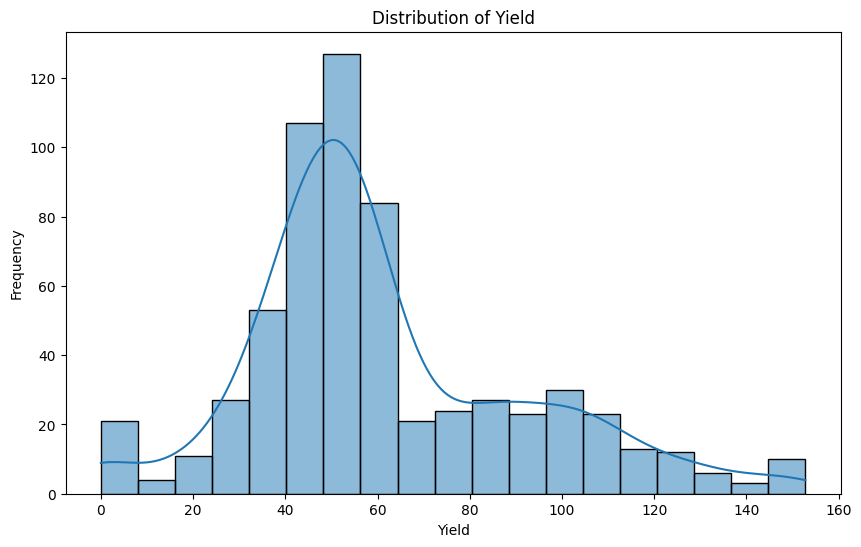

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis of "Yield"
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Total Yield'], kde=True)  # Replace 'Yield' with the actual column name
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

In [556]:
final_df.isnull().sum()

State                                       0
Ag District                                 0
County                                      0
Year                                        0
Total WHEAT - ACRES HARVESTED               0
Total WHEAT - PRODUCTION, MEASURED IN BU    0
Total WHEAT - SALES, MEASURED IN $          0
Total WHEAT, IRRIGATED - ACRES HARVESTED    0
Total Yield                                 0
County ANSI                                 0
dtype: int64

In [557]:
final_df.describe()

,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",Total Yield,County ANSI
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,626.000000,626.000000
mean,2016.563898,32467.308307,1.416435e+06,1.048275e+07,91.921725,61.227636,52.805112
std,4.141100,70973.649841,3.167916e+06,2.429351e+07,840.833449,30.191655,30.496379
min,2010.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,2013.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,43.325000,27.000000
50%,2017.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,53.900000,53.000000
75%,2020.000000,17047.500000,5.606692e+05,0.000000e+00,0.000000,78.975000,79.000000
max,2023.000000,413622.000000,1.890426e+07,1.585020e+08,16042.000000,152.800000,105.000000


In [558]:
numeric_df = final_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


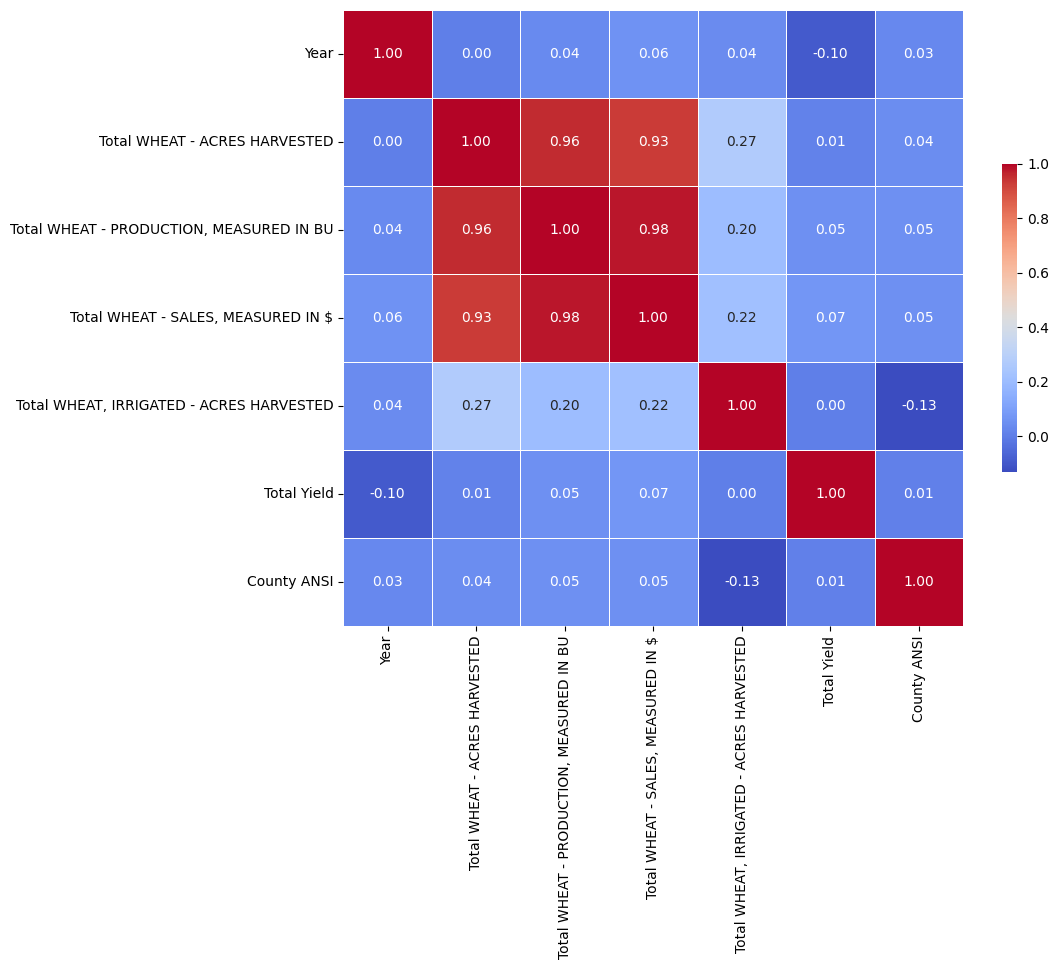

In [559]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [560]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [561]:
yield_ts = final_df['Total Yield']
model = ARIMA(yield_ts, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Total Yield   No. Observations:                  626
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3013.302
Date:                Sun, 03 Mar 2024   AIC                           6032.604
Time:                        03:50:34   BIC                           6045.917
Sample:                             0   HQIC                          6037.777
                                - 626                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0638      0.040      1.614      0.107      -0.014       0.141
ma.L1         -0.9669      0.011    -84.309      0.000      -0.989      -0.944
sigma2       898.3063     45.391     19.790      0.0

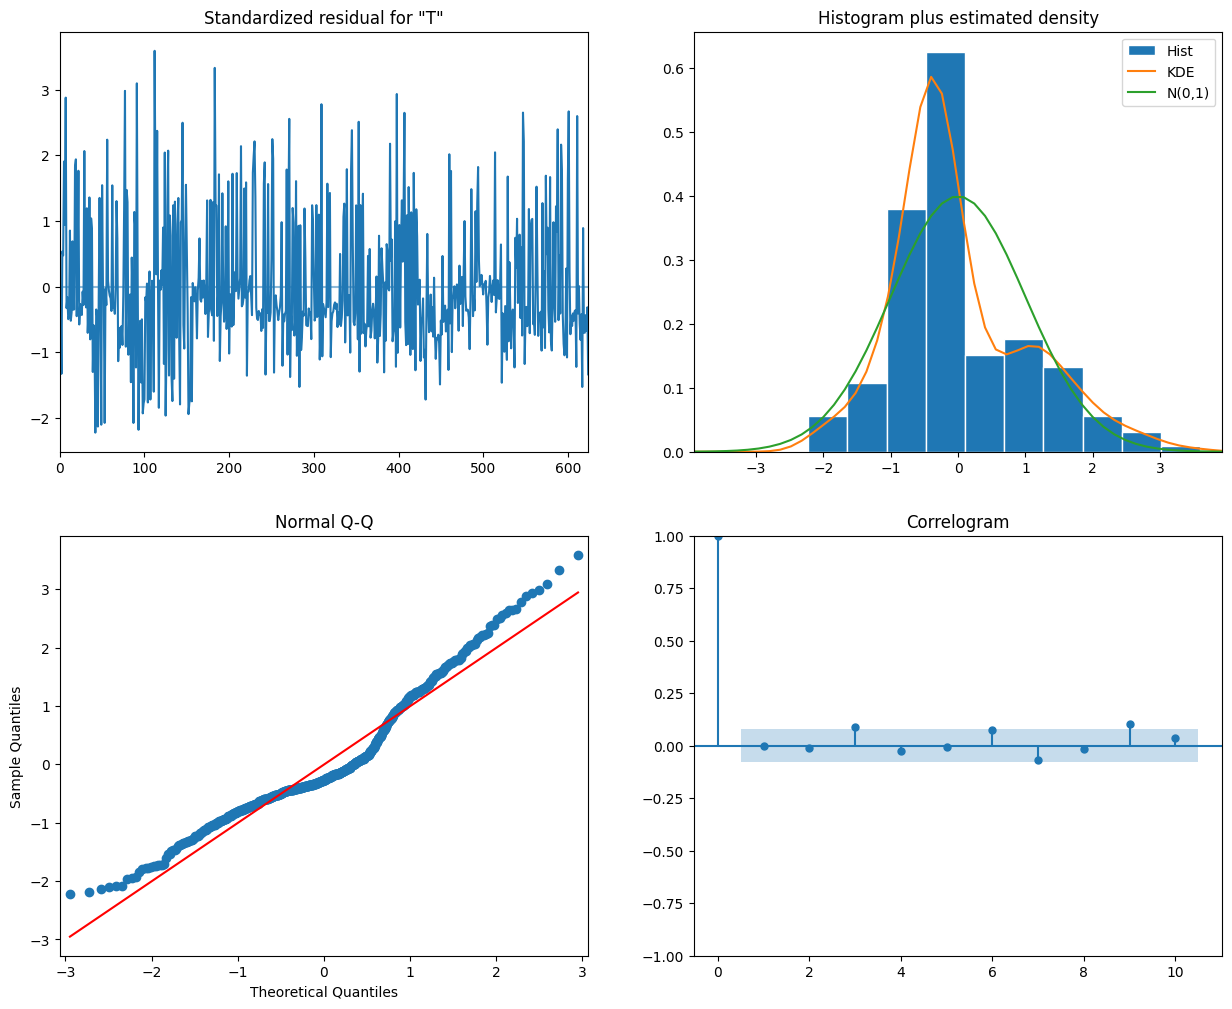

626    54.195714
627    56.544948
628    56.694936
629    56.704512
630    56.705123
Name: predicted_mean, dtype: float64


In [562]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast = model_fit.forecast(steps=5)  # Forecast the next 5 time points
print(forecast)

In [563]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [564]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df['Total Yield'].values.reshape(-1,1))


In [565]:
# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [566]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of the next value

model.compile(optimizer='adam', loss='mean_squared_error')



In [567]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
16/16 [==============================] - 5s 117ms/step - loss: 0.0874 - val_loss: 0.0516
Epoch 2/25
16/16 [==============================] - 0s 16ms/step - loss: 0.0423 - val_loss: 0.0397
Epoch 3/25
16/16 [==============================] - 0s 16ms/step - loss: 0.0395 - val_loss: 0.0404
Epoch 4/25
16/16 [==============================] - 0s 15ms/step - loss: 0.0397 - val_loss: 0.0398
Epoch 5/25
16/16 [==============================] - 0s 16ms/step - loss: 0.0381 - val_loss: 0.0407
Epoch 6/25
16/16 [==============================] - 0s 16ms/step - loss: 0.0402 - val_loss: 0.0397
Epoch 7/25
16/16 [==============================] - 0s 17ms/step - loss: 0.0400 - val_loss: 0.0396
Epoch 8/25
16/16 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.0398
Epoch 9/25
16/16 [==============================] - 0s 22ms/step - loss: 0.0384 - val_loss: 0.0406
Epoch 10/25
16/16 [==============================] - 0s 25ms/step - loss: 0.0382 - val_loss: 0.0392
Epoch 11

4/4 [==============================] - 1s 5ms/step


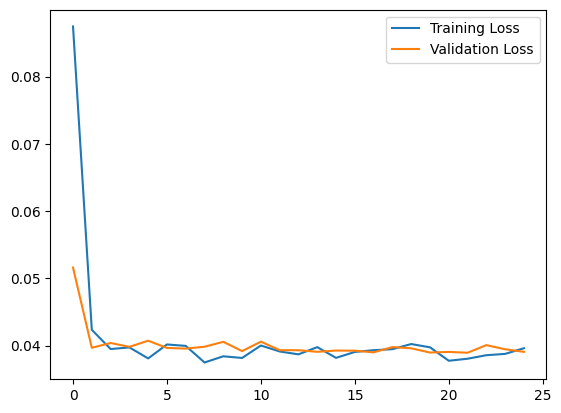

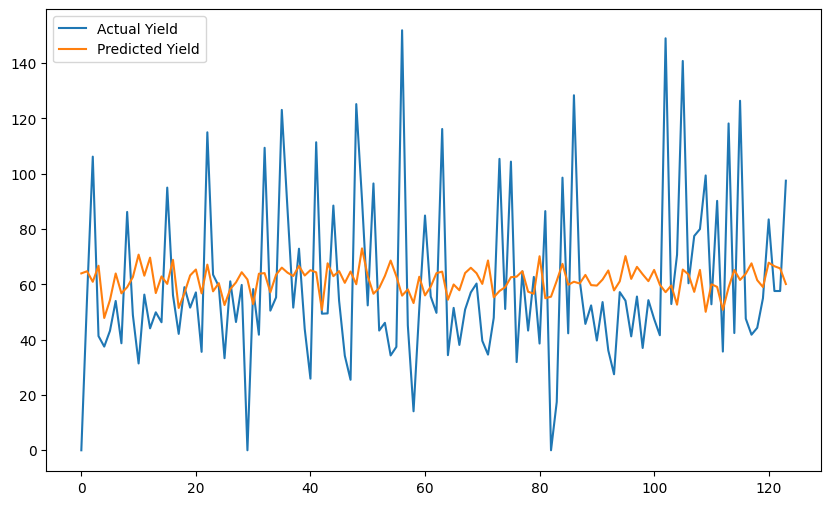

In [568]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values for comparison
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Yield')
plt.plot(predictions, label='Predicted Yield')
plt.legend()
plt.show()

In [569]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [570]:
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 23.34580394375709
Mean Squared Error (MSE): 912.2644580638369
Root Mean Squared Error (RMSE): 30.20371596449412


In [571]:
!pip install pystan==2.18.0.0

!pip install prophet

In [572]:
final_df['Date'] = pd.to_datetime(final_df['Year'], format='%Y').dt.strftime('01/01/%Y')

In [573]:
import pandas as pd
from prophet import Prophet

# Assuming 'final_df' has a 'Date' column and a 'Yield' column
final_df['ds'] = pd.to_datetime(final_df['Date'])
final_df.rename(columns={'Total Yield': 'y'}, inplace=True)



In [574]:
final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,Date,ds
0,NORTH DAKOTA,CENTRAL,EDDY,2012,42256.0,1713829.0,12749000.0,6.0,46.0,27,01/01/2012,2012-01-01
1,NORTH DAKOTA,CENTRAL,EDDY,2017,42829.0,2192578.0,11411000.0,0.0,48.1,27,01/01/2017,2017-01-01
2,NORTH DAKOTA,CENTRAL,EDDY,2022,35952.0,1840269.0,16007000.0,0.0,41.8,27,01/01/2022,2022-01-01
3,NORTH DAKOTA,CENTRAL,FOSTER,2012,48888.0,2308047.0,18537000.0,0.0,0.0,31,01/01/2012,2012-01-01
4,NORTH DAKOTA,CENTRAL,FOSTER,2017,41696.0,2047878.0,10803000.0,422.0,49.0,31,01/01/2017,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
621,NORTH DAKOTA,WEST CENTRAL,OLIVER,2014,0.0,0.0,0.0,0.0,38.1,25,01/01/2014,2014-01-01
622,NORTH DAKOTA,WEST CENTRAL,OLIVER,2016,0.0,0.0,0.0,0.0,45.2,25,01/01/2016,2016-01-01
623,NORTH DAKOTA,WEST CENTRAL,OLIVER,2019,0.0,0.0,0.0,0.0,38.1,53,01/01/2019,2019-01-01
624,NORTH DAKOTA,WEST CENTRAL,OLIVER,2020,0.0,0.0,0.0,0.0,47.7,53,01/01/2020,2020-01-01


In [575]:
# Select only the 'ds' and 'y' columns
prophet_df = final_df[['ds', 'y']].copy()

In [576]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with your DataFrame
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4dgmct3/zgylgz30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4dgmct3/qfy6eza4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56484', 'data', 'file=/tmp/tmpy4dgmct3/zgylgz30.json', 'init=/tmp/tmpy4dgmct3/qfy6eza4.json', 'output', 'file=/tmp/tmpy4dgmct3/prophet_model4ze9m5vk/prophet_model-20240303035104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:51:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:51:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [577]:
future = model.make_future_dataframe(periods=365)

In [578]:
forecast = model.predict(future)

In [579]:
forecast = model.predict(future)

In [580]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,87.370123,34.347989,109.796402,87.370123,87.370123,-15.339708,-15.339708,-15.339708,-15.339708,-15.339708,-15.339708,0.0,0.0,0.0,72.030415
1,2011-01-01,83.455183,36.123714,110.364733,83.455183,83.455183,-12.081645,-12.081645,-12.081645,-12.081645,-12.081645,-12.081645,0.0,0.0,0.0,71.373537
2,2012-01-01,79.540279,35.088172,108.555436,79.540279,79.540279,-8.817327,-8.817327,-8.817327,-8.817327,-8.817327,-8.817327,0.0,0.0,0.0,70.722952
3,2013-01-01,75.938494,21.956521,93.238802,75.938494,75.938494,-18.587552,-18.587552,-18.587552,-18.587552,-18.587552,-18.587552,0.0,0.0,0.0,57.350942
4,2014-01-01,72.730100,20.494915,92.854533,72.730100,72.730100,-15.339708,-15.339708,-15.339708,-15.339708,-15.339708,-15.339708,0.0,0.0,0.0,57.390391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2023-12-28,82.505596,85.900535,157.162942,82.156343,82.758238,41.069632,41.069632,41.069632,41.069632,41.069632,41.069632,0.0,0.0,0.0,123.575228
375,2023-12-29,82.512691,78.241663,152.608505,82.162381,82.766859,29.408076,29.408076,29.408076,29.408076,29.408076,29.408076,0.0,0.0,0.0,111.920766
376,2023-12-30,82.519785,60.639905,134.943848,82.168418,82.775144,17.047304,17.047304,17.047304,17.047304,17.047304,17.047304,0.0,0.0,0.0,99.567089
377,2023-12-31,82.526880,50.013622,123.459601,82.174398,82.783952,4.223121,4.223121,4.223121,4.223121,4.223121,4.223121,0.0,0.0,0.0,86.750000


In [581]:
import pickle

In [582]:
with open('/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/csv_prophet/prophet.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [584]:
final_df.to_csv('/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/csv_prophet/prophet.csv', index=False)

In [585]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
plot_plotly(model, forecast)

# Plot forecast components
plot_components_plotly(model, forecast)

In [586]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [587]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date', inplace=True)


In [588]:
print(final_df.columns)

Index(['State', 'Ag District', 'County', 'Year',
       'Total WHEAT - ACRES HARVESTED',
       'Total WHEAT - PRODUCTION, MEASURED IN BU',
       'Total WHEAT - SALES, MEASURED IN $',
       'Total WHEAT, IRRIGATED - ACRES HARVESTED', 'y', 'County ANSI', 'ds'],
      dtype='object')


In [589]:
final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,ds
Date,,,,,,,,,,,
2012-01-01,NORTH DAKOTA,CENTRAL,EDDY,2012,42256.0,1713829.0,12749000.0,6.0,46.0,27,2012-01-01
2017-01-01,NORTH DAKOTA,CENTRAL,EDDY,2017,42829.0,2192578.0,11411000.0,0.0,48.1,27,2017-01-01
2022-01-01,NORTH DAKOTA,CENTRAL,EDDY,2022,35952.0,1840269.0,16007000.0,0.0,41.8,27,2022-01-01
2012-01-01,NORTH DAKOTA,CENTRAL,FOSTER,2012,48888.0,2308047.0,18537000.0,0.0,0.0,31,2012-01-01
2017-01-01,NORTH DAKOTA,CENTRAL,FOSTER,2017,41696.0,2047878.0,10803000.0,422.0,49.0,31,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2014,0.0,0.0,0.0,0.0,38.1,25,2014-01-01
2016-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2016,0.0,0.0,0.0,0.0,45.2,25,2016-01-01
2019-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2019,0.0,0.0,0.0,0.0,38.1,53,2019-01-01


In [590]:
final_df['ds'] = pd.to_datetime(final_df['ds'])
final_df.set_index('ds', inplace=True)


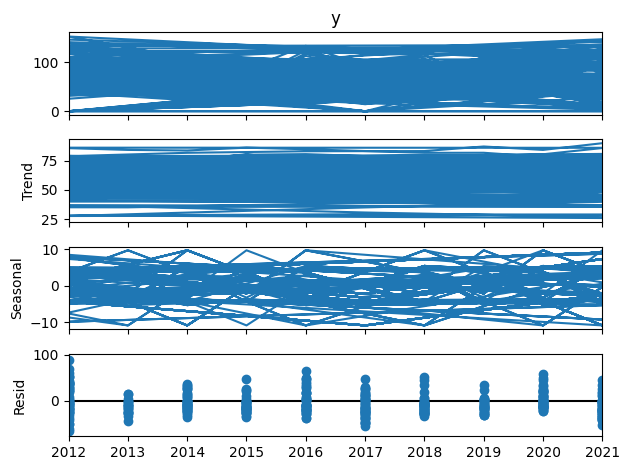

In [591]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(final_df['y'], model='additive', period=15)
# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [592]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Add the components as new columns to final_df
final_df['trend'] = trend
final_df['seasonality'] = seasonal
final_df['residual'] = residual

In [593]:
final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual
ds,,,,,,,,,,,,,
2012-01-01,NORTH DAKOTA,CENTRAL,EDDY,2012,42256.0,1713829.0,12749000.0,6.0,46.0,27,NaN,2.870969,NaN
2017-01-01,NORTH DAKOTA,CENTRAL,EDDY,2017,42829.0,2192578.0,11411000.0,0.0,48.1,27,NaN,-2.140576,NaN
2022-01-01,NORTH DAKOTA,CENTRAL,EDDY,2022,35952.0,1840269.0,16007000.0,0.0,41.8,27,NaN,9.755684,NaN
2012-01-01,NORTH DAKOTA,CENTRAL,FOSTER,2012,48888.0,2308047.0,18537000.0,0.0,0.0,31,NaN,3.569668,NaN
2017-01-01,NORTH DAKOTA,CENTRAL,FOSTER,2017,41696.0,2047878.0,10803000.0,422.0,49.0,31,NaN,-4.292470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2014,0.0,0.0,0.0,0.0,38.1,25,NaN,3.904030,NaN
2016-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2016,0.0,0.0,0.0,0.0,45.2,25,NaN,-3.230495,NaN
2019-01-01,NORTH DAKOTA,WEST CENTRAL,OLIVER,2019,0.0,0.0,0.0,0.0,38.1,53,NaN,4.909831,NaN


In [594]:
final_df.to_csv('/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/laglead.csv', index=False)

In [595]:
final_df['Total_yield_2yr_Lag'] = final_df.groupby(['State', 'Ag District', 'County'])['y'].shift(2)



In [596]:
final_df.isna().sum()

State                                         0
Ag District                                   0
County                                        0
Year                                          0
Total WHEAT - ACRES HARVESTED                 0
Total WHEAT - PRODUCTION, MEASURED IN BU      0
Total WHEAT - SALES, MEASURED IN $            0
Total WHEAT, IRRIGATED - ACRES HARVESTED      0
y                                             0
County ANSI                                   0
trend                                        14
seasonality                                   0
residual                                     14
Total_yield_2yr_Lag                         106
dtype: int64

In [597]:
final_df.dropna(subset=['trend','residual'])

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lag
ds,,,,,,,,,,,,,,
2017-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2017,67727.0,2121112.0,12103000.0,691.0,82.2,43,60.573333,-3.230495,24.857161,NaN
2022-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2022,66729.0,2467792.0,23636000.0,1524.0,145.0,43,60.700000,4.909831,79.390169,101.4
2012-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2012,117100.0,4549625.0,35827000.0,0.0,58.9,43,62.826667,3.729180,-7.655847,NaN
2017-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2017,110063.0,3706756.0,20350000.0,0.0,57.5,43,63.486667,-5.297974,-0.688692,NaN
2022-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2022,81892.0,3971696.0,35117000.0,0.0,46.7,83,66.780000,-3.751795,-16.328205,58.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2014,0.0,0.0,0.0,0.0,63.5,11,52.980000,-0.298950,10.818950,136.9
2016-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2016,0.0,0.0,0.0,0.0,46.7,41,52.593333,2.870969,-8.764302,56.5
2018-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2018,0.0,0.0,0.0,0.0,37.7,41,51.960000,-2.140576,-12.119424,63.5


In [598]:
final_df=final_df.dropna(subset=['trend','residual'])

In [599]:
final_df.isna().sum()

State                                         0
Ag District                                   0
County                                        0
Year                                          0
Total WHEAT - ACRES HARVESTED                 0
Total WHEAT - PRODUCTION, MEASURED IN BU      0
Total WHEAT - SALES, MEASURED IN $            0
Total WHEAT, IRRIGATED - ACRES HARVESTED      0
y                                             0
County ANSI                                   0
trend                                         0
seasonality                                   0
residual                                      0
Total_yield_2yr_Lag                         101
dtype: int64

In [600]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the years to integer labels
finall_df['Year'] = label_encoder.fit_transform(finall_df['Year'])
finall_df['Year'].head()

ds
2017-01-01     7
2022-01-01    12
2012-01-01     2
2017-01-01     7
2022-01-01    12
Name: Year, dtype: int64

In [601]:
finall_df=final_df.copy()

In [602]:
finall_df.columns

Index(['State', 'Ag District', 'County', 'Year',
       'Total WHEAT - ACRES HARVESTED',
       'Total WHEAT - PRODUCTION, MEASURED IN BU',
       'Total WHEAT - SALES, MEASURED IN $',
       'Total WHEAT, IRRIGATED - ACRES HARVESTED', 'y', 'County ANSI', 'trend',
       'seasonality', 'residual', 'Total_yield_2yr_Lag'],
      dtype='object')

In [603]:
finall_df.drop(columns=['State','Ag District','County'], inplace=True)

In [604]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [605]:
final_df['Total_yield_2yr_Lead'] = final_df.groupby(['State', 'Ag District', 'County'])['y'].shift(-2)


<ipython-input-605-17ef9fd79877>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [606]:
finall_df['Total_yield_2yr_Lead']=final_df['Total_yield_2yr_Lead']

In [607]:
finall_df.drop(columns=['Total_yield_2yr_Lag'], inplace = True)

In [608]:
finall_df['Year'].unique()


array([2017, 2022, 2012, 2010, 2013, 2016, 2020, 2021, 2023, 2011, 2014,
       2015, 2018, 2019])

In [609]:
X = finall_df.drop(columns=['y'])  # Features
y = finall_df['y']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"RMSE: {rmse}")

RMSE: 3.565788352260906


In [610]:
train_df = final_df[final_df['Year'] <= 2022]
test_df = final_df[final_df['Year'] == 2023]


In [611]:
test_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lag,Total_yield_2yr_Lead
ds,,,,,,,,,,,,,,,
2023-01-01,NORTH DAKOTA,CENTRAL,EDDY,2023,0.0,0.0,0.0,0.0,46.5,87,44.940000,-0.298950,1.858950,44.6,NaN
2023-01-01,NORTH DAKOTA,CENTRAL,FOSTER,2023,0.0,0.0,0.0,0.0,51.0,53,49.353333,3.729180,-2.082514,48.1,NaN
2023-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2023,0.0,0.0,0.0,0.0,149.0,65,65.093333,-4.292470,88.199137,87.8,NaN
2023-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2023,0.0,0.0,0.0,0.0,52.4,27,67.600000,4.909831,-20.109831,95.0,NaN
2023-01-01,NORTH DAKOTA,CENTRAL,STUTSMAN,2023,0.0,0.0,0.0,0.0,45.6,83,58.693333,-4.292470,-8.800863,83.1,NaN
2023-01-01,NORTH DAKOTA,CENTRAL,WELLS,2023,0.0,0.0,0.0,0.0,55.6,3,66.026667,-0.298950,-10.127717,53.1,NaN
2023-01-01,NORTH DAKOTA,EAST CENTRAL,BARNES,2023,0.0,0.0,0.0,0.0,59.9,91,67.686667,-5.297974,-2.488692,55.1,NaN
2023-01-01,NORTH DAKOTA,EAST CENTRAL,CASS,2023,0.0,0.0,0.0,0.0,135.8,9,74.680000,3.904030,57.215970,112.9,NaN
2023-01-01,NORTH DAKOTA,EAST CENTRAL,GRIGGS,2023,0.0,0.0,0.0,0.0,110.9,79,64.006667,9.755684,37.137649,54.4,NaN


In [612]:
train_df.drop(columns=['State','Ag District','County'])

,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lag,Total_yield_2yr_Lead
ds,,,,,,,,,,,,
2017-01-01,2017,67727.0,2121112.0,12103000.0,691.0,82.2,43,60.573333,-3.230495,24.857161,NaN,89.1
2022-01-01,2022,66729.0,2467792.0,23636000.0,1524.0,145.0,43,60.700000,4.909831,79.390169,101.4,30.5
2012-01-01,2012,117100.0,4549625.0,35827000.0,0.0,58.9,43,62.826667,3.729180,-7.655847,NaN,46.7
2017-01-01,2017,110063.0,3706756.0,20350000.0,0.0,57.5,43,63.486667,-5.297974,-0.688692,NaN,97.1
2022-01-01,2022,81892.0,3971696.0,35117000.0,0.0,46.7,83,66.780000,-3.751795,-16.328205,58.9,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,2014,0.0,0.0,0.0,0.0,63.5,11,52.980000,-0.298950,10.818950,136.9,37.7
2016-01-01,2016,0.0,0.0,0.0,0.0,46.7,41,52.593333,2.870969,-8.764302,56.5,48.0
2018-01-01,2018,0.0,0.0,0.0,0.0,37.7,41,51.960000,-2.140576,-12.119424,63.5,15.1


In [613]:
final_df['Year']

ds
2017-01-01    2017
2022-01-01    2022
2012-01-01    2012
2017-01-01    2017
2022-01-01    2022
              ... 
2014-01-01    2014
2016-01-01    2016
2018-01-01    2018
2020-01-01    2020
2021-01-01    2021
Name: Year, Length: 612, dtype: int64

In [614]:
final_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lag,Total_yield_2yr_Lead
ds,,,,,,,,,,,,,,,
2017-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2017,67727.0,2121112.0,12103000.0,691.0,82.2,43,60.573333,-3.230495,24.857161,NaN,89.1
2022-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2022,66729.0,2467792.0,23636000.0,1524.0,145.0,43,60.700000,4.909831,79.390169,101.4,30.5
2012-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2012,117100.0,4549625.0,35827000.0,0.0,58.9,43,62.826667,3.729180,-7.655847,NaN,46.7
2017-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2017,110063.0,3706756.0,20350000.0,0.0,57.5,43,63.486667,-5.297974,-0.688692,NaN,97.1
2022-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2022,81892.0,3971696.0,35117000.0,0.0,46.7,83,66.780000,-3.751795,-16.328205,58.9,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2014,0.0,0.0,0.0,0.0,63.5,11,52.980000,-0.298950,10.818950,136.9,37.7
2016-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2016,0.0,0.0,0.0,0.0,46.7,41,52.593333,2.870969,-8.764302,56.5,48.0
2018-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2018,0.0,0.0,0.0,0.0,37.7,41,51.960000,-2.140576,-12.119424,63.5,15.1


In [615]:
test_df.drop(columns=['State','Ag District','County'],inplace=True)

<ipython-input-615-3bcf134e6e63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [616]:
test_df.drop(columns=['Total_yield_2yr_Lag'],inplace=True)

<ipython-input-616-a2cf098d0051>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [617]:
train_df

,State,Ag District,County,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lag,Total_yield_2yr_Lead
ds,,,,,,,,,,,,,,,
2017-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2017,67727.0,2121112.0,12103000.0,691.0,82.2,43,60.573333,-3.230495,24.857161,NaN,89.1
2022-01-01,NORTH DAKOTA,CENTRAL,KIDDER,2022,66729.0,2467792.0,23636000.0,1524.0,145.0,43,60.700000,4.909831,79.390169,101.4,30.5
2012-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2012,117100.0,4549625.0,35827000.0,0.0,58.9,43,62.826667,3.729180,-7.655847,NaN,46.7
2017-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2017,110063.0,3706756.0,20350000.0,0.0,57.5,43,63.486667,-5.297974,-0.688692,NaN,97.1
2022-01-01,NORTH DAKOTA,CENTRAL,SHERIDAN,2022,81892.0,3971696.0,35117000.0,0.0,46.7,83,66.780000,-3.751795,-16.328205,58.9,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2014,0.0,0.0,0.0,0.0,63.5,11,52.980000,-0.298950,10.818950,136.9,37.7
2016-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2016,0.0,0.0,0.0,0.0,46.7,41,52.593333,2.870969,-8.764302,56.5,48.0
2018-01-01,NORTH DAKOTA,WEST CENTRAL,MERCER,2018,0.0,0.0,0.0,0.0,37.7,41,51.960000,-2.140576,-12.119424,63.5,15.1


In [618]:
train_df.drop(columns=['State','County','Ag District','Total_yield_2yr_Lag','State','Ag District','County'],inplace=True)

<ipython-input-618-9c82cd48023b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [619]:
label_encoder = LabelEncoder()

# Fit and transform the years to integer labels
train_df['Year'] = label_encoder.fit_transform(train_df['Year'])
train_df['Year'].head()

<ipython-input-619-7f4d0b66f914>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds
2017-01-01     7
2022-01-01    12
2012-01-01     2
2017-01-01     7
2022-01-01    12
Name: Year, dtype: int64

In [620]:

train_df['Year'].unique()

array([ 7, 12,  2,  0,  3,  6, 10, 11,  1,  4,  5,  8,  9])

In [621]:
train_df

,Year,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",y,County ANSI,trend,seasonality,residual,Total_yield_2yr_Lead
ds,,,,,,,,,,,
2017-01-01,7,67727.0,2121112.0,12103000.0,691.0,82.2,43,60.573333,-3.230495,24.857161,89.1
2022-01-01,12,66729.0,2467792.0,23636000.0,1524.0,145.0,43,60.700000,4.909831,79.390169,30.5
2012-01-01,2,117100.0,4549625.0,35827000.0,0.0,58.9,43,62.826667,3.729180,-7.655847,46.7
2017-01-01,7,110063.0,3706756.0,20350000.0,0.0,57.5,43,63.486667,-5.297974,-0.688692,97.1
2022-01-01,12,81892.0,3971696.0,35117000.0,0.0,46.7,83,66.780000,-3.751795,-16.328205,95.0
...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,4,0.0,0.0,0.0,0.0,63.5,11,52.980000,-0.298950,10.818950,37.7
2016-01-01,6,0.0,0.0,0.0,0.0,46.7,41,52.593333,2.870969,-8.764302,48.0
2018-01-01,8,0.0,0.0,0.0,0.0,37.7,41,51.960000,-2.140576,-12.119424,15.1


In [622]:
X_train = train_df.drop(columns=['y', 'Year'])  # Drop 'Year' and target column from features
y_train = train_df['y']

X_test = test_df.drop(columns=['y', 'Year'])  # Ensure the same columns are dropped in test set
y_test = test_df['y']

In [623]:
X_train

,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",County ANSI,trend,seasonality,residual,Total_yield_2yr_Lead
ds,,,,,,,,,
2017-01-01,67727.0,2121112.0,12103000.0,691.0,43,60.573333,-3.230495,24.857161,89.1
2022-01-01,66729.0,2467792.0,23636000.0,1524.0,43,60.700000,4.909831,79.390169,30.5
2012-01-01,117100.0,4549625.0,35827000.0,0.0,43,62.826667,3.729180,-7.655847,46.7
2017-01-01,110063.0,3706756.0,20350000.0,0.0,43,63.486667,-5.297974,-0.688692,97.1
2022-01-01,81892.0,3971696.0,35117000.0,0.0,83,66.780000,-3.751795,-16.328205,95.0
...,...,...,...,...,...,...,...,...,...
2014-01-01,0.0,0.0,0.0,0.0,11,52.980000,-0.298950,10.818950,37.7
2016-01-01,0.0,0.0,0.0,0.0,41,52.593333,2.870969,-8.764302,48.0
2018-01-01,0.0,0.0,0.0,0.0,41,51.960000,-2.140576,-12.119424,15.1


In [624]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [625]:
X_test

,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",County ANSI,trend,seasonality,residual,Total_yield_2yr_Lead
ds,,,,,,,,,
2023-01-01,0.0,0.0,0.0,0.0,87,44.940000,-0.298950,1.858950,NaN
2023-01-01,0.0,0.0,0.0,0.0,53,49.353333,3.729180,-2.082514,NaN
2023-01-01,0.0,0.0,0.0,0.0,65,65.093333,-4.292470,88.199137,NaN
2023-01-01,0.0,0.0,0.0,0.0,27,67.600000,4.909831,-20.109831,NaN
2023-01-01,0.0,0.0,0.0,0.0,83,58.693333,-4.292470,-8.800863,NaN
2023-01-01,0.0,0.0,0.0,0.0,3,66.026667,-0.298950,-10.127717,NaN
2023-01-01,0.0,0.0,0.0,0.0,91,67.686667,-5.297974,-2.488692,NaN
2023-01-01,0.0,0.0,0.0,0.0,9,74.680000,3.904030,57.215970,NaN
2023-01-01,0.0,0.0,0.0,0.0,79,64.006667,9.755684,37.137649,NaN


In [626]:
y_pred = xgb_model.predict(X_test)

In [627]:
X_train

,Total WHEAT - ACRES HARVESTED,"Total WHEAT - PRODUCTION, MEASURED IN BU","Total WHEAT - SALES, MEASURED IN $","Total WHEAT, IRRIGATED - ACRES HARVESTED",County ANSI,trend,seasonality,residual,Total_yield_2yr_Lead
ds,,,,,,,,,
2017-01-01,67727.0,2121112.0,12103000.0,691.0,43,60.573333,-3.230495,24.857161,89.1
2022-01-01,66729.0,2467792.0,23636000.0,1524.0,43,60.700000,4.909831,79.390169,30.5
2012-01-01,117100.0,4549625.0,35827000.0,0.0,43,62.826667,3.729180,-7.655847,46.7
2017-01-01,110063.0,3706756.0,20350000.0,0.0,43,63.486667,-5.297974,-0.688692,97.1
2022-01-01,81892.0,3971696.0,35117000.0,0.0,83,66.780000,-3.751795,-16.328205,95.0
...,...,...,...,...,...,...,...,...,...
2014-01-01,0.0,0.0,0.0,0.0,11,52.980000,-0.298950,10.818950,37.7
2016-01-01,0.0,0.0,0.0,0.0,41,52.593333,2.870969,-8.764302,48.0
2018-01-01,0.0,0.0,0.0,0.0,41,51.960000,-2.140576,-12.119424,15.1


In [628]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for 2023 predictions: {rmse}")

RMSE for 2023 predictions: 3.3629434501623954


In [629]:
with open('/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/csv_xgboost/Xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [630]:
final_df.to_csv('/content/drive/MyDrive/Conservatives-Official/Wheat_Yield/csv_xgboost/xgboost.csv', index=False)